# Exploratory Data Analysis on Crimes Against Women in India

## Objective
The objective of this analysis is to identify states with the highest crimes against women, analyze crime patterns across states, and cluster states based on crime data using exploratory data analysis techniques.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## Dataset Description

The dataset contains state-wise crime data against women in India across multiple years.  
The columns include:
- State: Name of the state
- Year: Year of record
- Rape: Number of rape cases
- K&A: Kidnap and assault cases
- DD: Dowry deaths
- AoW: Assault against women
- AoM: Assault against modesty of women
- DV: Domestic violence cases
- WT: Women trafficking cases


In [3]:
df = pd.read_csv("CrimesOnWomenData.csv")
df.head()


,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


## Data Cleaning

The dataset was cleaned by removing unnecessary columns and checking for missing values to ensure consistency and reliability of analysis.



In [4]:
# Drop unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Check missing values
df.isnull().sum()


,0
State,0
Year,0
Rape,0
K&A,0
DD,0
AoW,0
AoM,0
DV,0
WT,0


## State-wise Crime Analysis

Crime data was aggregated at the state level to calculate total crimes against women. This helps identify states with consistently high crime rates.



In [5]:
crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']

state_crime = df.groupby("State")[crime_cols].sum()
state_crime["Total_Crime"] = state_crime.sum(axis=1)

state_crime.sort_values("Total_Crime", ascending=False).head(10)


,Rape,K&A,DD,AoW,AoM,DV,WT,Total_Crime
State,,,,,,,,
Uttar Pradesh,30641,101701,21357,76654,20024,100227,330,350934
West Bengal,13108,37848,4006,33851,4952,171204,838,265807
Madhya Pradesh,43552,50457,5834,85442,13850,63272,387,262794
Rajasthan,31850,36059,3695,41801,2038,126917,662,243022
Maharashtra,24806,38061,2175,76029,20948,67545,2531,232095
Assam,19428,55094,1742,36528,2599,107680,339,223410
Andhra Pradesh,12728,9786,3053,49750,25925,96269,2531,200042
ANDHRA PRADESH,10696,11921,5112,42334,28759,92242,17,191081
UTTAR PRADESH,15053,32155,19258,22996,26500,62835,3,178800


## Visualizations

Bar charts and heatmaps were used to visualize crime distribution across states and understand the contribution of different crime types.


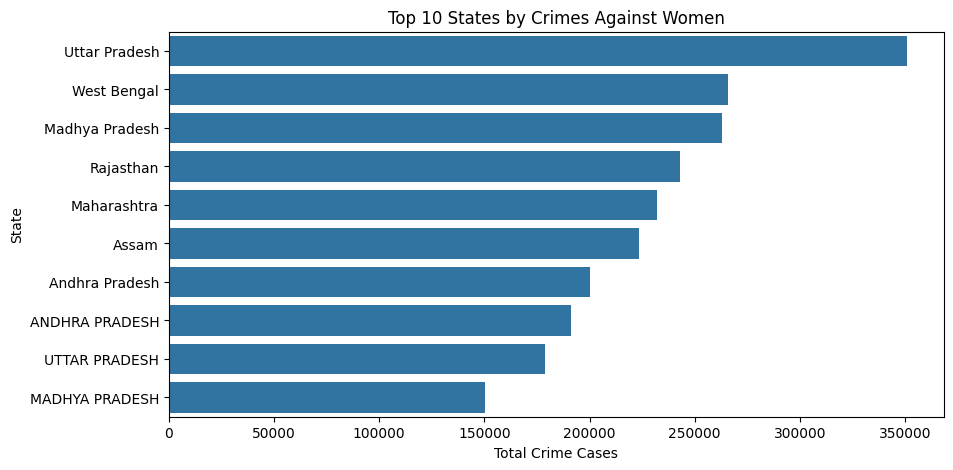

In [6]:
top_states = state_crime.sort_values("Total_Crime", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states["Total_Crime"], y=top_states.index)
plt.title("Top 10 States by Crimes Against Women")
plt.xlabel("Total Crime Cases")
plt.ylabel("State")
plt.show()


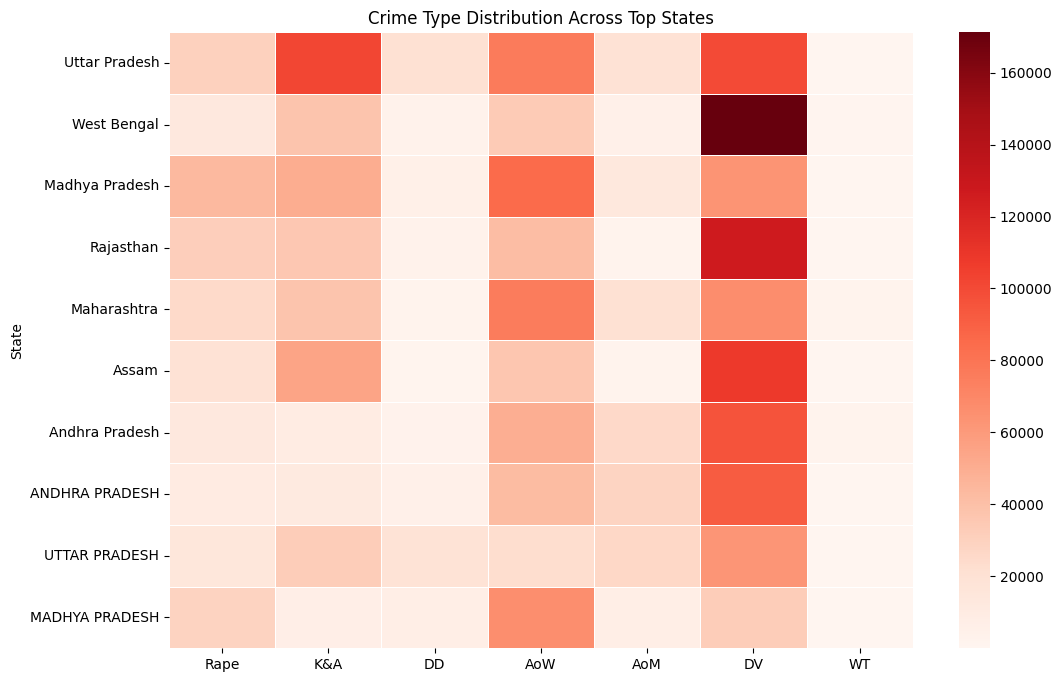

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(top_states[crime_cols], cmap="Reds", linewidths=0.5)
plt.title("Crime Type Distribution Across Top States")
plt.show()


In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_crime[crime_cols])

kmeans = KMeans(n_clusters=3, random_state=42)
state_crime["Cluster"] = kmeans.fit_predict(scaled_data)

state_crime["Cluster"].value_counts()


,count
Cluster,
0,49
1,17
2,4


## Clustering Analysis

KMeans clustering was applied on standardized crime data to group states into clusters based on similar crime patterns.


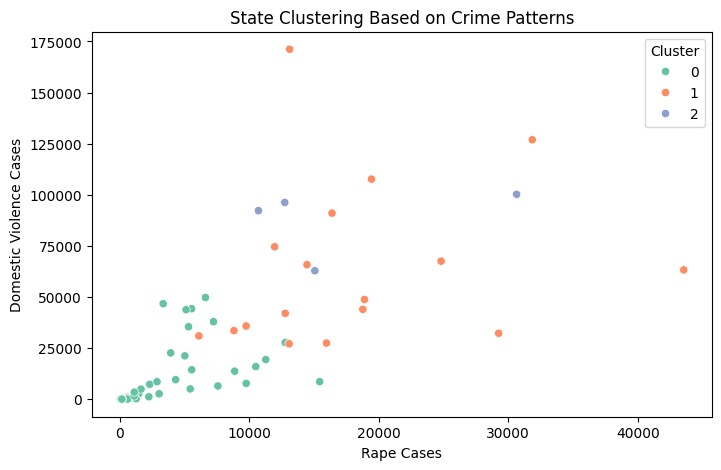

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=state_crime["Rape"],
    y=state_crime["DV"],
    hue=state_crime["Cluster"],
    palette="Set2"
)
plt.title("State Clustering Based on Crime Patterns")
plt.xlabel("Rape Cases")
plt.ylabel("Domestic Violence Cases")
plt.show()


## Insights & Conclusion

Exploratory Data Analysis of crimes against women in India reveals clear state-wise and crime-type patterns. States such as Uttar Pradesh, Madhya Pradesh, Rajasthan, Maharashtra, and West Bengal consistently report the highest total crimes against women. Among different crime categories, domestic violence and assault against women contribute significantly to the overall crime volume across most states.

The heatmap visualization shows that rape cases are particularly high in certain central and northern states, while domestic violence cases dominate in highly populated regions. Dowry deaths, though lower in number, remain a serious concern in specific regions, indicating deep-rooted social issues.

Clustering analysis grouped states into three major clusters: high-crime, moderate-crime, and low-crime states. High-crime clusters mainly consist of large and populous states with consistently high values across multiple crime categories. Moderate clusters show selective dominance in certain crime types, while low-crime clusters include smaller states and union territories with comparatively fewer reported cases.

Overall, the analysis highlights strong regional variations in crimes against women and emphasizes the need for targeted policy interventions. Different states require customized strategies based on their dominant crime patterns rather than a uniform national approach.

